In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../Data/text.csv');

data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


(   Unnamed: 0                                               text  label
 0           0      i just feel really helpless and heavy hearted      4
 1           1  ive enjoyed being able to slouch about relax a...      0
 2           2  i gave up my internship with the dmrg and am f...      4
 3           3                         i dont know i feel so lost      0
 4           4  i am a kindergarten teacher and i am thoroughl...      4,
 None)

In [3]:
data = data.drop(columns=['Unnamed: 0'])

data.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/gaurav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/gaurav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gaurav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove @mentions, hashtags, and special characters
    text = re.sub(r'@\w+|#\w+|[^\w\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize tokens
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

# Apply the cleaning function to the text column
data['cleaned_text'] = data['text'].apply(clean_text)

# Display the first few rows of the cleaned data
data.head(10)

,text,label,cleaned_text
0,i just feel really helpless and heavy hearted,4,feel really helpless heavy hearted
1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed able slouch relax unwind frankly n...
2,i gave up my internship with the dmrg and am f...,4,gave internship dmrg feeling distraught
3,i dont know i feel so lost,0,dont know feel lost
4,i am a kindergarten teacher and i am thoroughl...,4,kindergarten teacher thoroughly weary job take...
5,i was beginning to feel quite disheartened,0,beginning feel quite disheartened
6,i would think that whomever would be lucky eno...,2,would think whomever would lucky enough stay s...
7,i fear that they won t ever feel that deliciou...,1,fear ever feel delicious excitement christmas ...
8,im forever taking some time out to have a lie ...,5,im forever taking time lie feel weird
9,i can still lose the weight without feeling de...,0,still lose weight without feeling deprived


/tmp/ipykernel_36543/3293235082.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Set2')


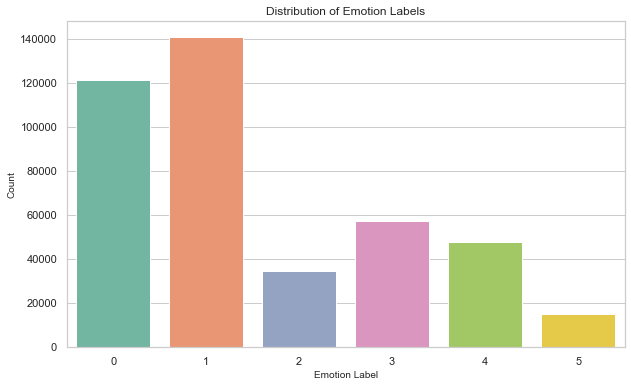

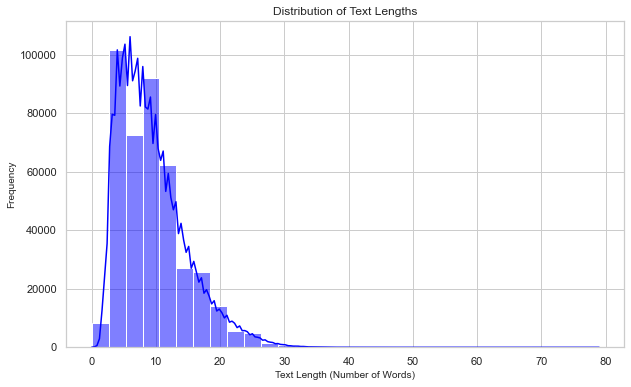

In [6]:
# Set up the visual style
sns.set_theme(style="whitegrid")

# Distribution of emotion labels
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=data, palette='Set2')
plt.title('Distribution of Emotion Labels')
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.show()

# Text length analysis
data['text_length'] = data['cleaned_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Text Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)

# Step 3: Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8992946426429308

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     24201
           1       0.92      0.93      0.92     28164
           2       0.81      0.77      0.79      6929
           3       0.90      0.90      0.90     11441
           4       0.85      0.85      0.85      9594
           5       0.77      0.70      0.73      3033

    accuracy                           0.90     83362
   macro avg       0.86      0.85      0.86     83362
weighted avg       0.90      0.90      0.90     83362


Confusion Matrix:
 [[22844   315    70   540   389    43]
 [  362 26228  1127   145   148   154]
 [   79  1454  5314    47    22    13]
 [  535   215    37 10340   301    13]
 [  496   197    30   348  8114   409]
 [   63   246    16    11   570  2127]]


Accuracy: 0.8993

Classification Report:
               precision    recall  f1-score   support

     sadness       0.94      0.94      0.94     24201
         joy       0.92      0.93      0.92     28164
        love       0.81      0.77      0.79      6929
       anger       0.90      0.90      0.90     11441
        fear       0.85      0.85      0.85      9594
    surprise       0.77      0.70      0.73      3033

    accuracy                           0.90     83362
   macro avg       0.86      0.85      0.86     83362
weighted avg       0.90      0.90      0.90     83362



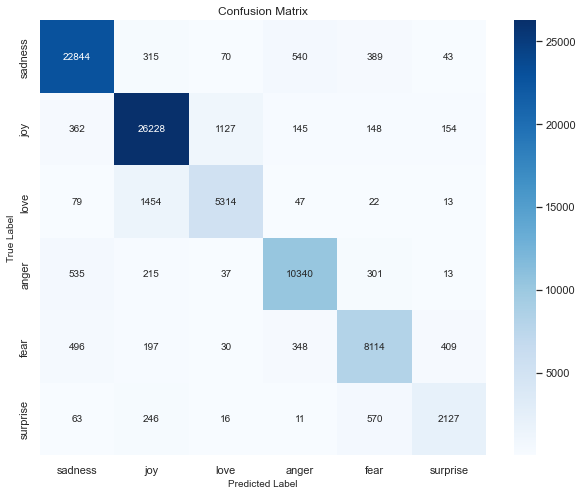

In [8]:
# Predict on the test set
y_pred = model.predict(X_test)

# 1. Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Generate Classification Report
report = classification_report(y_test, y_pred, target_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
print("\nClassification Report:\n", report)

# 3. Plot a Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
            yticklabels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength for Logistic Regression
    'solver': ['liblinear', 'saga'],  # Solvers that work well with small datasets
}

# Initialize the model
logistic_model = LogisticRegression(max_iter=1000)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 1, 'solver': 'liblinear'}


In [10]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")


Cross-Validation Scores: [0.90044984 0.90004498 0.90230773 0.90158797 0.90032839]
Mean CV Score: 0.9009


In [32]:
# Assuming that your model and TF-IDF vectorizer are already loaded and trained

# Function to clean and preprocess user input text (use your existing preprocessing logic)
def preprocess_input(text):
    text_cleaned = clean_text(text)  # Apply the same cleaning as during training
    text_vectorized = tfidf_vectorizer.transform([text_cleaned])
    return text_vectorized

# Take input from the user
user_input = input("Enter text to predict the emotion: ")

# Preprocess the input text 
input_vectorized = preprocess_input(user_input)
print(input_vectorized)
# Predict the emotion
predicted_emotion = model.predict(input_vectorized)

# Map the predicted label to the corresponding emotion
emotion_dict = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
predicted_label = emotion_dict[predicted_emotion[0]]

# Display the predicted emotion
print(f"The predicted emotion is: {predicted_label}")


  (0, 1647)	1.0
The predicted emotion is: fear
